<a href="https://colab.research.google.com/github/Breno-Valle/LowCostAirbnb/blob/main/AirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting started

In [ ]:
#importing libs

import pandas as              pd
import matplotlib.pyplot as   plt
import seaborn as             sns
import numpy as               np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
RJ_data = pd.read_csv(r'http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-10-25/data/listings.csv.gz')
RJ_data.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20201025230850,2020-10-26,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Patio or balcony"", ""Dishes and silverware"", ...",$134.00,5,180,5,5,1125,1125,5.0,1125.0,NaN,t,0,0,0,0,2020-10-26,255,14,1,2010-07-15,2020-10-13,93.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,2.04
1,21280,https://www.airbnb.com/rooms/21280,20201025230850,2020-10-26,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,This is the best neighborhood in Zona Sul. Fo...,https://a0.muscache.com/pictures/60851312/b22e...,81163,https://www.airbnb.com/users/show/81163,Jules,2010-02-14,"Chicago, Illinois, United States",Hi I am Jules and I have a beautiful apartment...,within a day,100%,90%,f,https://a0.muscache.com/im/users/81163/profile...,https://a0.muscache.com/im/users/81163/profile...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98467,-43.19611,Entire apartment,Entire home/apt,6,NaN,2 baths,2.0,4.0,"[""Dishes and silverware"", ""TV"", ""Essentials"", ...",$450.00,30,720,30,30,720,720,30.0,720.0,NaN,t,30,41,59,59,2020-10-26,94,6,0,2014-02-14,2020-03-22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,1.15


Relevant features:
- name
- host_response_time
- host_response_rate
- host_acceptance_rate 
- host_neighbourhood
- host_verifications
-	host_has_profile_pic
-	host_identity_verified
-	neighbourhood
- neighbourhood_cleansed	
- latitude
-	longitude
- property_type
-	room_type
-	accommodates
- bathrooms_text	
- bedrooms
-	beds
- price
-	minimum_nights
-	maximum_nights
- availability_365
-	number_of_reviews
- review_scores_rating
- review_scores_accuracy
- review_scores_location
-	review_scores_value
- reviews_per_month

In [ ]:
#list with the most relevant and easy to ma=enage features
important_list =[
                  'name','host_response_time','host_response_rate',
                  'host_acceptance_rate', 'host_neighbourhood','host_verifications',
                  'host_has_profile_pic','host_identity_verified','neighbourhood',
                  'neighbourhood_cleansed',	'latitude','longitude',
                  'property_type','room_type','accommodates',
                  'bathrooms_text',	'bedrooms','beds',
                  'price','minimum_nights','maximum_nights',
                  'availability_365','number_of_reviews','review_scores_rating',
                  'review_scores_accuracy','review_scores_location',
                  'review_scores_value','reviews_per_month' 
                ]

#Exploratory data analysis
##-->Rio de Janeiro

1- SHAPE

In [ ]:
# Shape of the dataframe objetic
shape = RJ_data.shape
print(f'Number of Columns: {shape[1]}\n')
print(f'Number of Rows: {shape[0]}')

Number of Columns: 74

Number of Rows: 24030


2 - Types

In [ ]:
#Firts of all we need to know our data types 
  #if you wanto to display all the information about your columns and rows uncomment the following two lines
#pd.options.display.max_columns= None
#pd.options.display.max_rows= None
RJ_data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

- We have a lot of object types on our data. Some of them will be treated
Others that wont be usefull will be droped, just like the ones with "url".

- Price its been represented as Object type and must be in Dollars

- bathrooms_text is a object type, must be converted to int

- host_response_time, host_response_rate, host_acceptance_rate are all object type features, must be converted to float

3- Missing values

In [ ]:
# Looking for absolute missing values
  #if you want to take a look on all values of a column you can just uncomment these two code lines 
#pd.options.display.max_columns= None
#pd.options.display.max_rows= None

RJ_data.isnull().sum()



id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              29
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               8781
Length: 74, dtype: int64

In [ ]:
# a better source of information about the missing values is the relative percenteage of it

(RJ_data.isnull().sum() / shape[0])*100


id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
name                                             0.120682
                                                  ...    
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
reviews_per_month                               36.541823
Length: 74, dtype: float64

In [ ]:
#list with the features that have most missing values
missing_list = [
                'neighborhood_overview', 'host_response_time','host_response_rate',                               
                'host_acceptance_rate','host_neighbourhood', 'neighbourhood',                    
                'neighbourhood_group_cleansed', 'bathrooms_text','first_review',           
                'last_review','review_scores_rating', 'review_scores_accuracy',                           
                'review_scores_cleanliness','review_scores_checkin','review_scores_communication',                     
                'review_scores_location',                          
                'review_scores_value'
                ]
         

In [ ]:
# now we need to check if the most important features match with that features who have a lot of missing data
  
[print(c) for c in important_list if c in missing_list]

host_response_time
host_response_rate
host_acceptance_rate
host_neighbourhood
neighbourhood
bathrooms_text
review_scores_rating
review_scores_accuracy
review_scores_location
review_scores_value


[None, None, None, None, None, None, None, None, None, None]

These are some of the features that we must pay a lot of attencion when we are handling it

IMPORTANT:

- Now that we are entering on the numeric analysis, we must deal with the feature price, cleaning, transforming it into a float and make it an usable number, than convert it to Dollars

In [ ]:
RJ_data['price'] = [c.replace('$', '') for c in RJ_data['price']]
RJ_data['price'] = [c.replace(',', '') for c in RJ_data['price']]
RJ_data['price'] = [float(c) for c in RJ_data['price']]
RJ_data['price'] = [c/5.31 for c in RJ_data['price']]
RJ_data['price'] = [round(c, 2) for c in RJ_data['price']]

In [ ]:
RJ_data['price']

0         25.24
1         84.75
2         30.13
3         52.92
4         25.42
          ...  
24025     43.31
24026     22.60
24027    301.32
24028     16.57
24029    150.66
Name: price, Length: 24030, dtype: float64

Important too: 


transform feature "bathrooms_text" in numerical 

In [ ]:
RJ_data['bathrooms_text'].dtype

dtype('O')

In [ ]:
RJ_data['bathrooms_text'].value_counts()

1 bath               9443
2 baths              4812
1 shared bath        2218
1 private bath       1555
3 baths              1401
1.5 baths            1170
2.5 baths             838
2 shared baths        508
1.5 shared baths      384
3.5 baths             367
4 baths               325
4.5 baths             149
5 baths               126
2.5 shared baths       82
6 baths                78
3 shared baths         77
5.5 baths              76
7 baths                51
0 baths                40
8 baths                38
6.5 baths              38
3.5 shared baths       35
4 shared baths         33
0 shared baths         32
7.5 baths              18
Shared half-bath       14
5 shared baths         10
6 shared baths          7
Half-bath               6
11 baths                5
7 shared baths          4
6.5 shared baths        2
12 baths                2
10.5 baths              2
4.5 shared baths        2
8.5 baths               2
20 shared baths         1
Private half-bath       1
15.5 baths  

In [ ]:
#we want to extract the bathroom type of each location

numbers = ['0', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6', '6.5', '7', '7.5', '8', '8.5', '9', '9.5',
        '10', '10.5', '11', '11.5', '12', '12.5', '13', '13.5', '14', '14.5', '15', '15.5', '16', '16.5', '17', '17.5',
        '18', '18.5', '19', '19.5', '20', '.']
bath2 = []
for cont in RJ_data['bathrooms_text']:
  for c in str(cont):
    if c in numbers:
      cont = (cont).replace(c, '')
      cont = (cont).replace(' ', '')
  bath2.append(cont)
RJ_data['bathroom_type'] = bath2   
RJ_data['bathroom_type']

0         bath
1        baths
2         bath
3        baths
4         bath
         ...  
24025     bath
24026     bath
24027    baths
24028     bath
24029    baths
Name: bathroom_type, Length: 24030, dtype: object

In [ ]:
# we also wanto to know hor many bathrooms there are in each location
bath3 = []
for cont in RJ_data['bathrooms_text']:
  for c in str(cont):
    cont = str(cont)
    if c.isalpha():
      cont = cont.replace(c, '')
      cont = cont.replace(' ', '')
  bath3.append(cont)
RJ_data['bathroom_number'] = bath3   
RJ_data['bathroom_number']

0          1
1          2
2          1
3        1.5
4          1
        ... 
24025      1
24026      1
24027      2
24028      1
24029    2.5
Name: bathroom_number, Length: 24030, dtype: object

In [ ]:
#convert it into float

number = []
for c in RJ_data['bathroom_number']:
  if '.' in c:
    c = float(c)
    number.append(c)
  else:
    n = c+'.0'
    n = float(n)
    number.append(n)

RJ_data['bathroom_number'] = number
RJ_data['bathroom_number']


0        1.0
1        2.0
2        1.0
3        1.5
4        1.0
        ... 
24025    1.0
24026    1.0
24027    2.0
24028    1.0
24029    2.5
Name: bathroom_number, Length: 24030, dtype: float64

In [ ]:
#now that we cleaned and create two column with two separate information we can drop the original column
RJ_data.drop('bathrooms', axis = 1, inplace= True)
RJ_data.drop('bathrooms_text', axis = 1, inplace= True)
RJ_data.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type,bathroom_number
0,17878,https://www.airbnb.com/rooms/17878,20201025230850,2020-10-26,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,2.0,2.0,"[""Patio or balcony"", ""Dishes and silverware"", ...",25.24,5,180,5,5,1125,1125,5.0,1125.0,NaN,t,0,0,0,0,2020-10-26,255,14,1,2010-07-15,2020-10-13,93.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,2.04,bath,1.0
1,21280,https://www.airbnb.com/rooms/21280,20201025230850,2020-10-26,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,This is the best neighborhood in Zona Sul. Fo...,https://a0.muscache.com/pictures/60851312/b22e...,81163,https://www.airbnb.com/users/show/81163,Jules,2010-02-14,"Chicago, Illinois, United States",Hi I am Jules and I have a beautiful apartment...,within a day,100%,90%,f,https://a0.muscache.com/im/users/81163/profile...,https://a0.muscache.com/im/users/81163/profile...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98467,-43.19611,Entire apartment,Entire home/apt,6,2.0,4.0,"[""Dishes and silverware"", ""TV"", ""Essentials"", ...",84.75,30,720,30,30,720,720,30.0,720.0,NaN,t,30,41,59,59,2020-10-26,94,6,0,2014-02-14,2020-03-22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,1.15,baths,2.0


4- Describing

In [ ]:
RJ_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_number
count,2.403000e+04,2.403000e+04,2.403000e+04,24022.000000,24022.000000,0.0,24030.000000,24030.000000,24030.000000,22500.000000,23790.000000,24030.000000,24030.000000,2.403000e+04,24030.000000,24030.000000,2.403000e+04,2.403000e+04,24030.000000,2.403000e+04,0.0,24030.000000,24030.000000,24030.000000,24030.000000,24030.000000,24030.000000,24030.000000,14679.00000,14666.000000,14669.000000,14667.000000,14672.000000,14667.000000,14669.000000,0.0,24030.000000,24030.000000,24030.000000,24030.000000,15249.000000,24030.000000
mean,2.294790e+07,2.020103e+13,9.017416e+07,7.758555,7.758555,NaN,-22.964936,-43.250611,4.145568,1.701378,2.537873,141.200882,4.747357,4.224505e+04,4.630920,5.264253,4.234378e+04,4.235368e+04,4.789363,4.235167e+04,NaN,20.815314,44.059093,67.001040,239.574532,12.080441,2.858593,0.226800,94.73847,9.652871,9.411616,9.812095,9.773446,9.767437,9.305815,NaN,6.240117,5.315522,0.804744,0.086683,0.567877,1.640366
std,1.461524e+07,1.925821e+00,9.730316e+07,28.127650,28.127650,NaN,0.035544,0.097310,2.513527,1.054676,2.090891,1076.900945,17.897167,6.450938e+06,17.600292,18.801904,6.450937e+06,6.450937e+06,17.777847,6.450937e+06,NaN,11.707148,21.985602,30.789678,128.567450,29.333586,6.031758,0.746653,9.29834,0.897766,1.088486,0.718164,0.777510,0.727296,1.029895,NaN,19.912067,19.438114,1.697502,0.609770,0.776404,1.047710
min,1.787800e+04,2.020103e+13,1.173900e+04,0.000000,0.000000,NaN,-23.072970,-43.704790,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,-0.000000
25%,1.123807e+07,2.020103e+13,1.390163e+07,1.000000,1.000000,NaN,-22.984450,-43.309283,2.000000,1.000000,1.000000,28.250000,1.000000,3.000000e+01,1.000000,2.000000,6.000000e+01,8.900000e+01,1.800000,8.900000e+01,NaN,11.000000,32.000000,51.000000,102.000000,0.000000,0.000000,0.000000,93.00000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.100000,1.000000
50%,2.114629e+07,2.020103e+13,5.596663e+07,2.000000,2.000000,NaN,-22.971050,-43.197455,4.000000,1.000000,2.000000,49.530000,2.000000,1.125000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.300000,1.125000e+03,NaN,28.000000,57.000000,84.000000,293.000000,2.000000,0.000000,0.000000,98.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.240000,1.000000
75%,3.832887e+07,2.020103e+13,1.265160e+08,4.000000,4.000000,NaN,-22.948310,-43.186510,5.000000,2.000000,3.000000,103.580000,4.000000,1.125000e+03,4.000000,5.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,30.000000,60.000000,90.000000,364.000000,9.000000,3.000000,0.000000,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,0.730000,2.000000
max,4.604803e+07,2.020103e+13,3.730634e+08,458.000000,458.000000,NaN,-22.749820,-43.104860,16.000000,30.000000,50.000000,121303.390000,730.000000,1.000000e+09,730.000000,730.000000,1.000000e+09

Good to notice: some caracteristcs of your data

 exemple: 

- acommodates has 75% os the values under 6, but the maximum its 16. Probably there are some outliers here
- same with beds, bedrooms, price, minimum and maximum nights, number of reviews and reviews per month

5 Distribuition

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f2d9e0d0>,
      dtype=object)

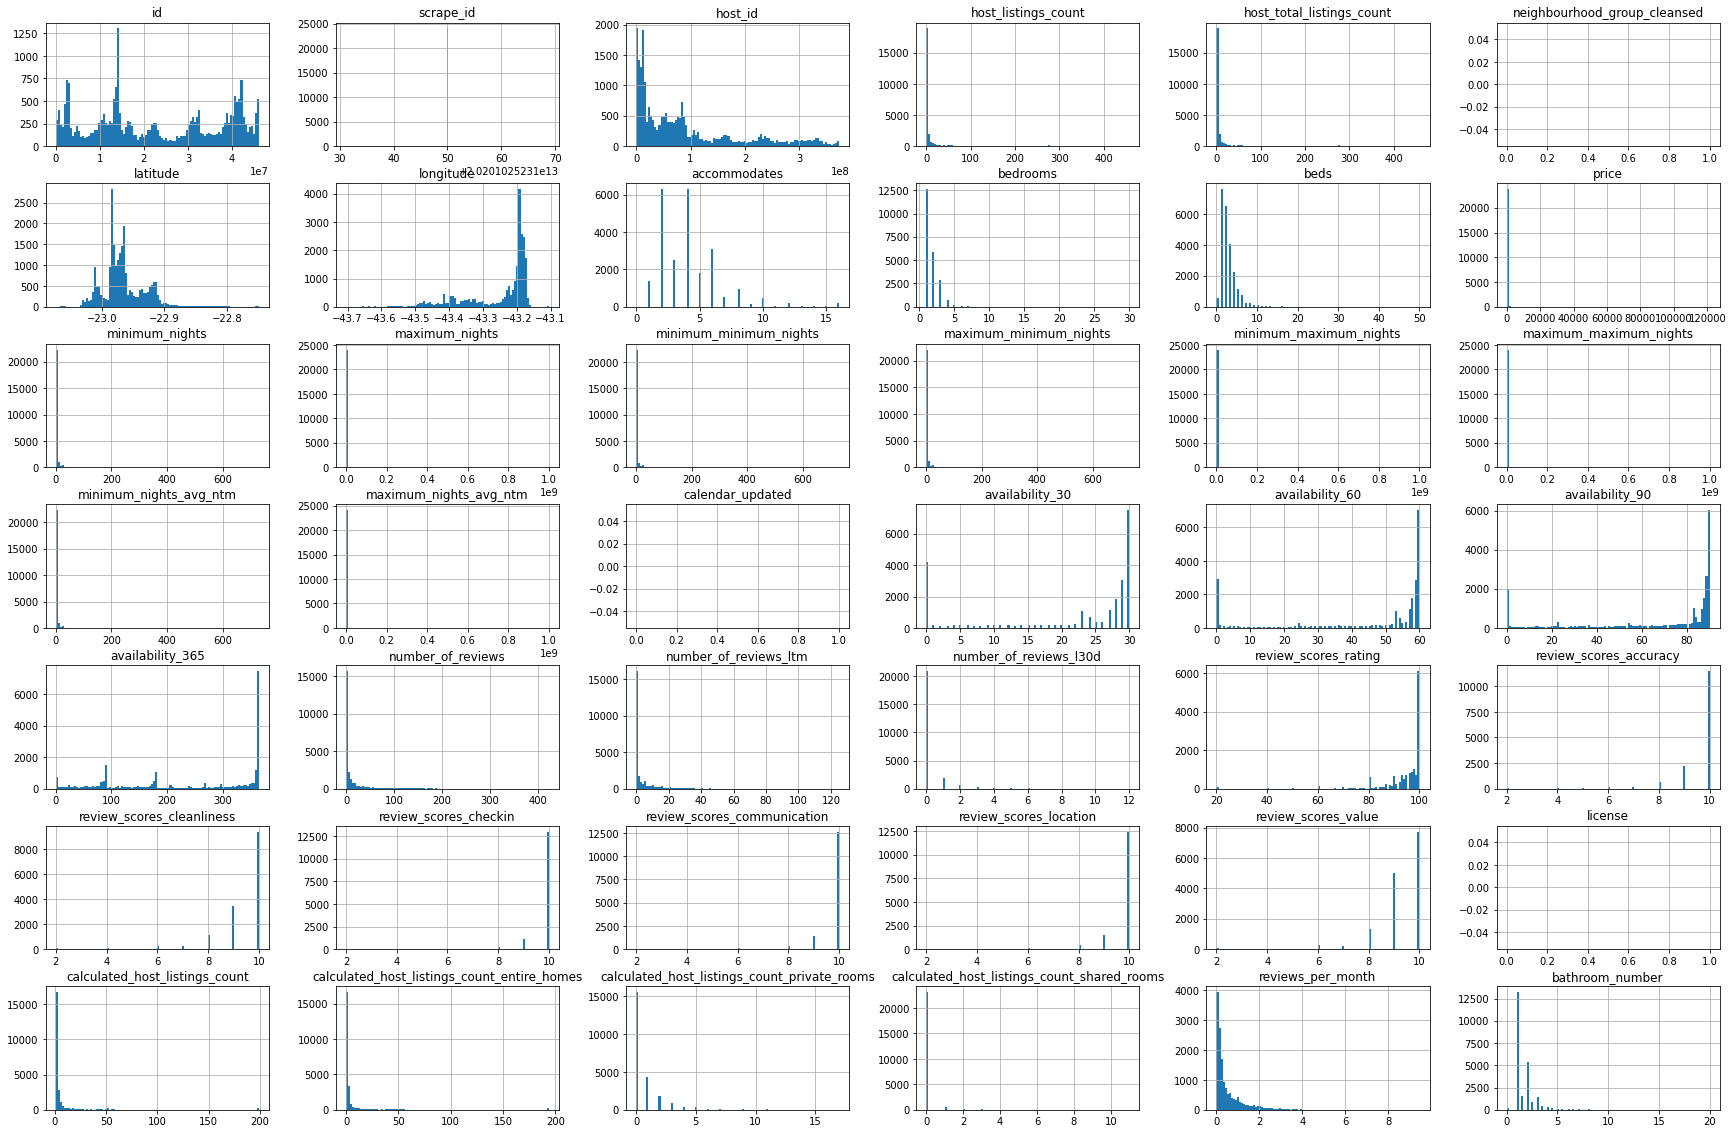

In [ ]:
RJ_data.hist(bins= 100, figsize=(30, 20))

--Some relevant insight here :

Longitude has a pick on -43.2. It means the most parte of the locations are near of the beach.

Latitude has the picks of location, but it kind of follow a normal distribution, with a lot of locations in the middle of the city

Accomodates has a pick in 2 and 4, it seems to be a relevant info

Most part of locations have only one bedroom

Price have been not good representation


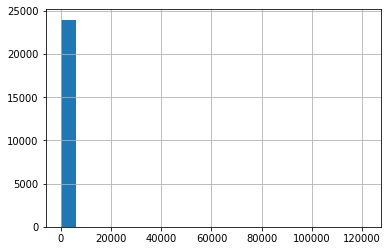

In [ ]:
#look to the X axis, the range of it its hugh and make impossibel to get a good compreension about the distibuition of the values
#that must be fixed later 
RJ_data['price'].hist(bins= 20)

Here we can complement the describe analysis with the distibuitions analysis

-We realize that the present features counteins outliers:
- beds
- bedrooms
- minimum and maximum nights
- number of reviews
- reviews per month
- acommodates
- reviews score cleanliness
- availability-365
- reviews scores rating
- price

####6- DEALING WITH OUTLIERS
- Another relevant treatment we need to implement on our data is dealing with outliers, mainly beacuse they will affect our imediatly objective, who is take a good observation on our data, on its distibuion and correlation 

In [ ]:
# firts of all, lets see which of the features with important outliers have a normal distribuition

list = ['beds', 'bedrooms', 'minimum_nights', 'maximum_nights','number_of_reviews',
'reviews_per_month','accommodates', 'review_scores_cleanliness',
'availability_365','review_scores_rating','price']
for c in list:
    if c == 'beds':
      mean = RJ_data[c].mean()
      median = RJ_data[c].median()
      mode = round(RJ_data[c].mode(), 3)
      central_dist = pd.DataFrame({'beds': [mean, median, mode[0]]}, index = ['Mean', 'Median', 'Mode'])
    else:
      mean = RJ_data[c].mean()
      median = RJ_data[c].median()
      mode = round(RJ_data[c].mode(), 3)
      central_dist[c] = [mean, median, mode[0]]
central_dist

,beds,bedrooms,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,accommodates,review_scores_cleanliness,availability_365,review_scores_rating,price
Mean,2.537873,1.701378,4.747357,42245.047898,12.080441,0.567877,4.145568,9.411616,239.574532,94.73847,141.200882
Median,2.000000,1.000000,2.000000,1125.000000,2.000000,0.240000,4.000000,10.000000,293.000000,98.00000,49.530000
Mode,1.000000,1.000000,1.000000,1125.000000,0.000000,0.120000,4.000000,10.000000,365.000000,100.00000,47.080000


In [ ]:
#creating a function to locate ouliers

def  loc_outlier(list):
  for c in list:
    print(f'{c}')
    sup_outlier = RJ_data[c].mean() + 2* RJ_data[c].std()
    inf_outlier = RJ_data[c].mean() - 2* RJ_data[c].std()
    print(f'{round(sup_outlier, 2)}')
    print(f'{round(inf_outlier, 2)}') 
    print(' ')
loc_outlier(list)

beds
6.72
-1.64
 
bedrooms
3.81
-0.41
 
minimum_nights
40.54
-31.05
 
maximum_nights
12944120.29
-12859630.2
 
number_of_reviews
70.75
-46.59
 
reviews_per_month
2.12
-0.98
 
accommodates
9.17
-0.88
 
review_scores_cleanliness
11.59
7.23
 
availability_365
496.71
-17.56
 
review_scores_rating
113.34
76.14
 
price
2295.0
-2012.6
 


attetion: as we can see, negative bounder is offten negative in this case, so we'll cut only the positive outliers

In [ ]:
# defining a function who will cut almost 5% of the data (outliers)

def  cut_outlier(list):
  for c in list:
    sup_outlier = RJ_data[c].mean() + 1.8* RJ_data[c].std()
    df_remove = RJ_data[c].loc[RJ_data[c] > sup_outlier]
    RJ_data[c] = RJ_data[c].drop(df_remove.index)
cut_outlier(list)  


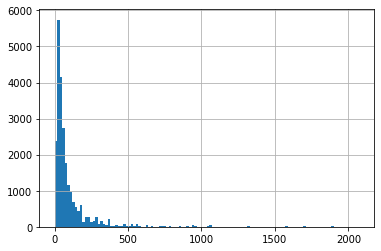

In [ ]:
RJ_data['price'].hist(bins=120)

In [ ]:
list = ['beds', 'bedrooms', 'minimum_nights', 'maximum_nights','number_of_reviews',
'reviews_per_month','accommodates', 'review_scores_cleanliness',
'availability_365','review_scores_rating','price']
for c in list:
    if c == 'beds':
      mean = RJ_data[c].mean()
      median = RJ_data[c].median()
      mode = round(RJ_data[c].mode(), 3)
      central_dist = pd.DataFrame({'beds': [mean, median, mode[0]]}, index = ['Mean', 'Median', 'Mode'])
    else:
      mean = RJ_data[c].mean()
      median = RJ_data[c].median()
      mode = round(RJ_data[c].mode(), 3)
      central_dist[c] = [mean, median, mode[0]]
central_dist

,beds,bedrooms,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,accommodates,review_scores_cleanliness,availability_365,review_scores_rating,price
Mean,2.279259,1.544941,3.692955,630.425819,6.528265,0.413234,3.745639,9.411616,239.574532,94.73847,102.255514
Median,2.000000,1.000000,2.000000,1125.000000,1.000000,0.210000,4.000000,10.000000,293.000000,98.00000,48.960000
Mode,1.000000,1.000000,1.000000,1125.000000,0.000000,0.120000,4.000000,10.000000,365.000000,100.00000,47.080000


Text(0.5, 1.0, 'price')

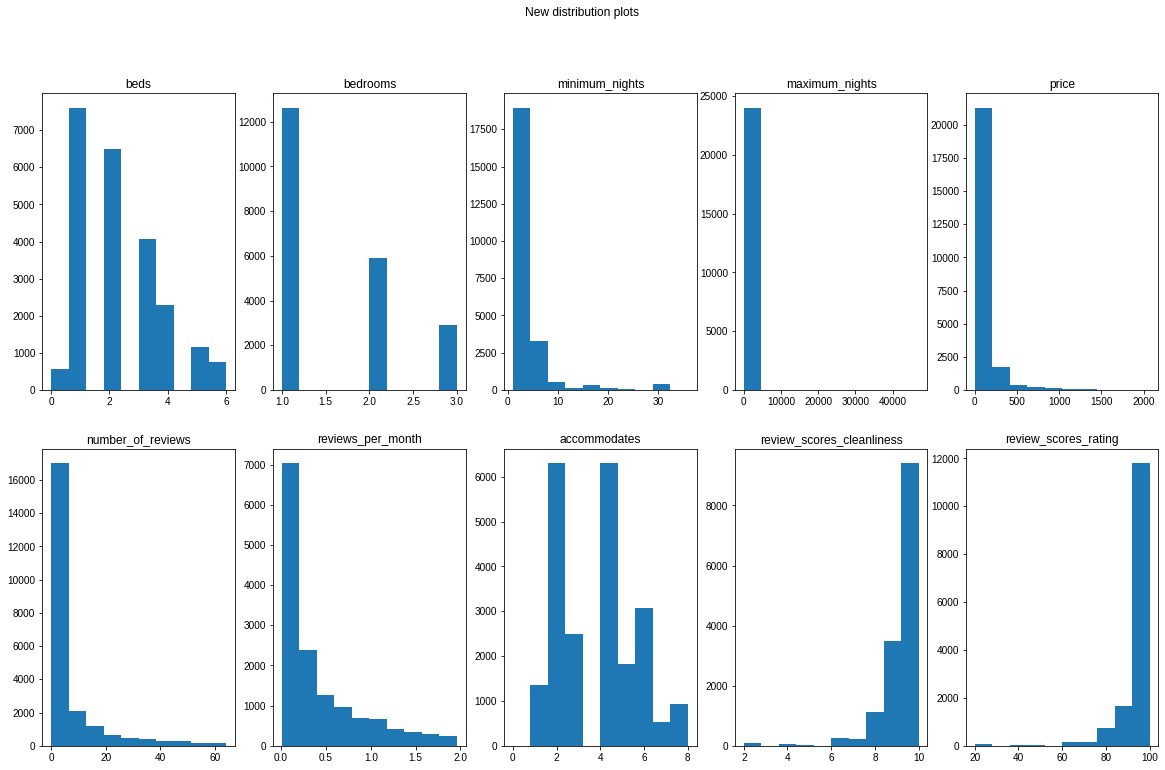

In [ ]:
#taking a look on these new values
fig1, axes1 = plt.subplots(ncols=5, nrows=2, figsize=(20, 12))
plt.suptitle('New distribution plots')
plt.style.use('seaborn')

axes1[0, 0].hist(RJ_data['beds'])
axes1[0,0].set_title('beds')

axes1[0, 1].hist(RJ_data['bedrooms'])
axes1[0,1].set_title('bedrooms')

axes1[0, 2].hist(RJ_data['minimum_nights'])
axes1[0,2].set_title('minimum_nights')

axes1[0, 3].hist(RJ_data['maximum_nights'])
axes1[0,3].set_title('maximum_nights')

axes1[1, 0].hist(RJ_data['number_of_reviews'])
axes1[1,0].set_title('number_of_reviews')

axes1[1, 1].hist(RJ_data['reviews_per_month'])
axes1[1,1].set_title('reviews_per_month')

axes1[1, 2].hist(RJ_data['accommodates'])
axes1[1,2].set_title('accommodates')

axes1[1, 3].hist(RJ_data['review_scores_cleanliness'])
axes1[1,3].set_title('review_scores_cleanliness')

axes1[1, 4].hist(RJ_data['review_scores_rating'])
axes1[1,4].set_title('review_scores_rating')

axes1[0, 4].hist(RJ_data['price'])
axes1[0,4].set_title('price')


Bonus- Creating a new metric

In [ ]:
#reviews rating will be relevant to create a new feature, them we input the mean of the feature values to turn this in something usable 
mean = round(RJ_data['review_scores_rating'].mean(), 0)
RJ_data['review_scores_rating'] = np.where(RJ_data['review_scores_rating'].isnull(), mean, RJ_data['review_scores_rating'])
RJ_data['review_scores_rating']

0        93.0
1        97.0
2        94.0
3        94.0
4        98.0
         ... 
24025    95.0
24026    95.0
24027    95.0
24028    95.0
24029    95.0
Name: review_scores_rating, Length: 24030, dtype: float64

The correlation_cost_ratio is a measurement of how good are the reviews per cost of location. In other words: "how much satistisfaction you get for the money you put on it".

Here higher is better!

In [ ]:
# creating a new metric now
RJ_data['benefit_cost_ratio'] = [(RJ_data['review_scores_rating'][c] / RJ_data['price'][c])*100 for c in range(0, 24030)]
RJ_data['benefit_cost_ratio']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


0        368.462758
1        114.454277
2        311.981414
3        177.626606
4        385.523210
            ...    
24025    219.348880
24026    420.353982
24027     31.527944
24028    573.325287
24029     63.055887
Name: benefit_cost_ratio, Length: 24030, dtype: float64

As you can see we created some outliers here too, lets handle it.

In [ ]:
#inf = RJ_data['benefit_cost_ratio'].loc[RJ_data['benefit_cost_ratio']> 2000]
RJ_data['benefit_cost_ratio'] = np.where( RJ_data['benefit_cost_ratio'] > 1600, 1200,  RJ_data['benefit_cost_ratio'])

7- Correlation

Correlations tells us how much of the variation of a feature can be explaned by another one. Here we going to use the Person metric(R^2)



In [ ]:
RJ_data[['host_response_time','host_response_rate',
                  'host_acceptance_rate', 'host_neighbourhood','host_verifications',
                  'host_has_profile_pic','host_identity_verified',
                  'neighbourhood_cleansed',	'latitude','longitude',
                  'property_type','room_type','accommodates',
                  'bathroom_type','bathroom_number',	'bedrooms','beds',
                  'price','minimum_nights','maximum_nights',
                  'availability_365','number_of_reviews','review_scores_rating',
                  'review_scores_accuracy','review_scores_location',
                  'review_scores_value','reviews_per_month', 'benefit_cost_ratio']].corr()

,latitude,longitude,accommodates,bathroom_number,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_location,review_scores_value,reviews_per_month,benefit_cost_ratio
latitude,1.000000,0.316376,-0.159169,-0.167081,-0.145505,-0.116756,-0.132387,-0.048748,0.005533,0.059810,-0.071091,0.011195,0.014767,-0.087849,0.051532,-0.077845,0.284519
longitude,0.316376,1.000000,-0.042594,-0.148493,-0.099828,-0.058414,-0.097938,-0.049809,-0.002354,-0.070549,0.110984,-0.004853,0.028312,0.129500,0.009793,0.047358,0.079351
accommodates,-0.159169,-0.042594,1.000000,0.494583,0.690017,0.683570,0.318115,0.058228,0.024029,-0.000946,0.012180,-0.014997,-0.013543,0.018690,-0.061285,0.037452,-0.442010
bathroom_number,-0.167081,-0.148493,0.494583,1.000000,0.609458,0.450928,0.472179,0.089782,0.021397,0.051545,-0.063154,0.010153,-0.013084,-0.014175,-0.027532,-0.043029,-0.303862
bedrooms,-0.145505,-0.099828,0.690017,0.609458,1.000000,0.607511,0.337761,0.122350,0.001499,0.016325,-0.032678,0.006181,0.001542,0.015725,-0.043133,-0.015708,-0.427245
beds,-0.116756,-0.058414,0.683570,0.450928,0.607511,1.000000,0.244862,0.046750,0.001346,0.006606,0.015880,0.002036,-0.001745,0.022821,-0.023577,0.037323,-0.303863
price,-0.132387,-0.097938,0.318115,0.472179,0.337761,0.244862,1.000000,0.107762,0.024760,0.126903,-0.156633,0.009575,-0.037893,-0.013254,-0.067879,-0.142822,-0.444385
minimum_nights,-0.048748,-0.049809,0.058228,0.089782,0.122350,0.046750,0.107762,1.000000,-0.107462,0.015814,-0.090356,-0.003224,-0.006449,0.004908,-0.015715,-0.067090,-0.066341
maximum_nights,0.005533,-0.002354,0.024029,0.021397,0.001499,0.001346,0.024760,-0.107462,1.000000,0.085134,-0.021540,-0.023906,-0.012194,-0.009014,-0.031960,-0.017138,-0.020861
availability_365,0.059810,-0.070549,-0.000946,0.051545,0.016325,0.006606,0.126903,0.015814,0.085134,1.000000,-0.142345,-0.053773,-0.075067,-0.079361,-0.073292,-0.186464,-0.109254


As we can see, most part of the correlations are week or moderated acording to Pearson's R. 

For example: price has a positive correlation with bedrooms, bathrooms, accomodates.

benefit_cost_ratio has a negative correlation with beds, price, accomodates, bedrooms and bathroom_number


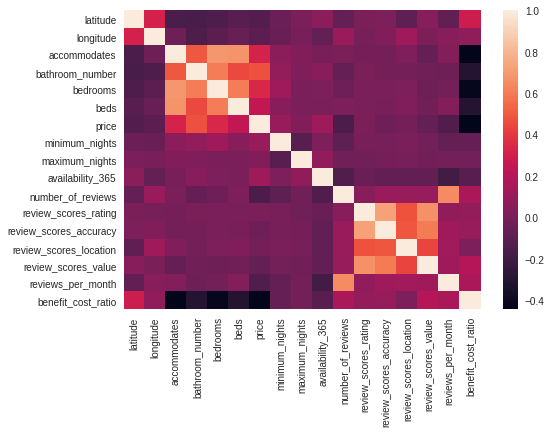

In [ ]:
#for better vizualization of that data let's use a heat map

sns.heatmap(RJ_data[['host_response_time','host_response_rate',
                  'host_acceptance_rate', 'host_neighbourhood','host_verifications',
                  'host_has_profile_pic','host_identity_verified',
                  'neighbourhood_cleansed',	'latitude','longitude',
                  'property_type','room_type','accommodates',
                  'bathroom_type', 'bathroom_number','bedrooms','beds',
                  'price','minimum_nights','maximum_nights',
                  'availability_365','number_of_reviews','review_scores_rating',
                  'review_scores_accuracy','review_scores_location',
                  'review_scores_value','reviews_per_month', 'benefit_cost_ratio']].corr())

#Report RJ 

Where are the bests places for searching a good realationship between price and score?

In [ ]:
#we want focous only in low cost locations, so lets filter it
RJ_data['price2'] = RJ_data['price'].loc[RJ_data['price']<100]

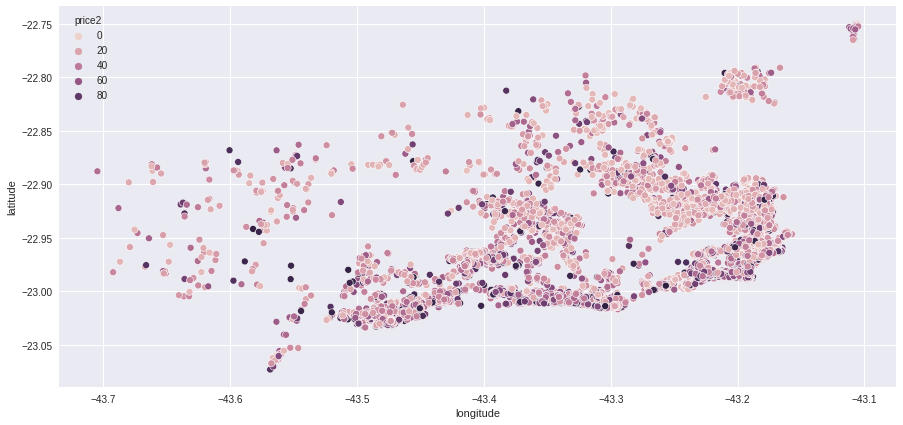

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=RJ_data['longitude'], y = RJ_data['latitude'], hue=RJ_data['price2'])

Higher prices are concentraded near to the beachs. Locations closer to the forests have lower prices.

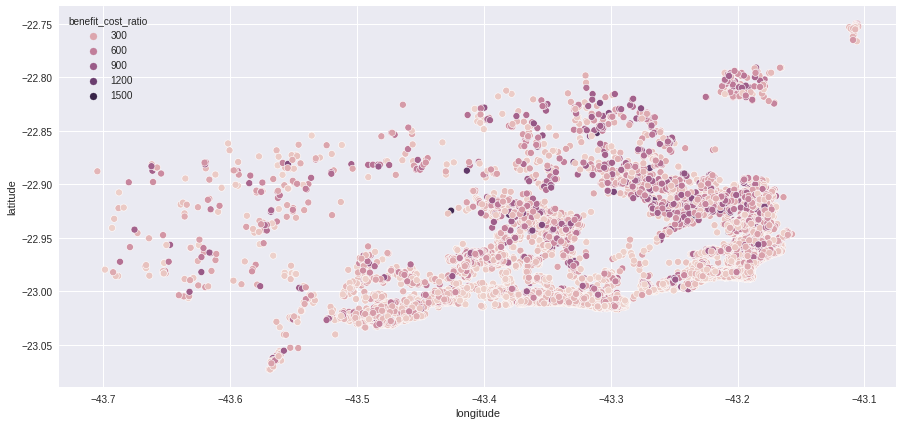

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=RJ_data['longitude'], y = RJ_data['latitude'], hue=RJ_data['benefit_cost_ratio'])

As we can see the best benefit cost ratios are not around of the beach. But concentraded in a few neighbourhood and closer to the forests,

In [ ]:
#list of the bests locations to reverse in relation with benefit cost ratio :

RJ_data.loc[RJ_data['benefit_cost_ratio'] >= 1000].count() # best 106 places to pay attention
best_places = RJ_data.loc[RJ_data['benefit_cost_ratio'] >= 1000]
best_places.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type,bathroom_number,benefit_cost_ratio,price2
141,273363,https://www.airbnb.com/rooms/273363,20201025230850,2020-10-26,Lindo quarto para longas temporadas,This is a bedroom that has been refurbished bu...,Santa Teresa is a unique and very interesting ...,https://a0.muscache.com/pictures/14927696/cfd2...,556738,https://www.airbnb.com/users/show/556738,Casa Da Carmen E,2011-05-04,"Rio de Janeiro, Rio de Janeiro, Brazil",Somos um Cama e Café localizado em Santa Teres...,within a day,100%,100%,f,https://a0.muscache.com/im/pictures/user/69463...,https://a0.muscache.com/im/pictures/user/69463...,Santa Teresa,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Santa Teresa,NaN,-22.91892,-43.18080,Private room in house,Private room,1.0,1.0,1.0,"[""Patio or balcony"", ""Lock on bedroom door"", ""...",9.04,NaN,1125.0,90,90,1125,1125,90.0,1125.0,NaN,t,0,0,20,295,2020-10-26,4.0,0,0,2015-03-11,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,4,0,4,0,0.06,privatebath,1.0,1106.194690,9.04
144,273753,https://www.airbnb.com/rooms/273753,20201025230850,2020-10-26,Beautiful room for students,It's a comfortable room and is located on the ...,Santa Teresa is a unique and very interesting ...,https://a0.muscache.com/pictures/14680208/3c86...,556738,https://www.airbnb.com/users/show/556738,Casa Da Carmen E,2011-05-04,"Rio de Janeiro, Rio de Janeiro, Brazil",Somos um Cama e Café localizado em Santa Teres...,within a day,100%,100%,f,https://a0.muscache.com/im/pictures/user/69463...,https://a0.muscache.com/im/pictures/user/69463...,Santa Teresa,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Santa Teresa,NaN,-22.91676,-43.18070,Private room in house,Private room,1.0,1.0,1.0,"[""Patio or balcony"", ""Lock on bedroom door"", ""...",9.04,NaN,180.0,50,50,180,180,50.0,180.0,NaN,t,0,0,0,0,2020-10-26,10.0,0,0,2019-06-17,2019-10-02,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,4,0,4,0,0.60,privatebath,1.0,1061.946903,9.04
589,888143,https://www.airbnb.com/rooms/888143,20201025230850,2020-10-26,Female Room 01 @Santa Teresa / Rio,"Casa para Estudantes ( Intercambistas, Mestran...",É poder caminhar nas ruas do bairro de Santa T...,https://a0.muscache.com/pictures/13335887/e687...,4710077,https://www.airbnb.com/users/show/4710077,Gabriella,2013-01-15,Brasil,"Olá, me chamo Gabryella, estudo e trabalho no...",within a day,100%,100%,t,https://a0.muscache.com/im/pictures/user/19a58...,https://a0.muscache.com/im/pictures/user/19a58...,Santa Teresa,2.0,2.0,"['phone', 'reviews', 'jumio', 'selfie', 'gover...",t,t,"Rio, Rio de Janeiro, Brazil",Santa Teresa,NaN,-22.91617,-43.18230,Private room in apartment,Private room,1.0,NaN

In [ ]:
#bests neighbourhood
best_places['neighbourhood_cleansed'].value_counts()

Copacabana                  8
Santa Teresa                8
Botafogo                    8
Flamengo                    6
Centro                      6
Rio Comprido                5
Vidigal                     5
Leme                        4
Taquara                     4
Laranjeiras                 4
Tijuca                      4
Jacarepaguá                 3
Recreio dos Bandeirantes    3
Maracanã                    3
Rocinha                     2
Gamboa                      2
Vila Isabel                 2
São Conrado                 2
Cosme Velho                 2
Parque Anchieta             2
Catete                      2
Cidade de Deus              1
Maria da Graça              1
Cordovil                    1
Pechincha                   1
Glória                      1
Cachambi                    1
Campo Grande                1
Bento Ribeiro               1
Gávea                       1
Jardim Botânico             1
Penha                       1
Cascadura                   1
Brás de Pi

In [ ]:
best_places['beds'].value_counts()

1.0    49
2.0    15
6.0     6
5.0     5
3.0     4
0.0     4
4.0     2
Name: beds, dtype: int64

In [ ]:
best_places['accommodates'].value_counts()


1.0    46
2.0    21
6.0    12
4.0     6
3.0     5
8.0     4
5.0     2
0.0     1
7.0     1
Name: accommodates, dtype: int64

In [ ]:
best_places['property_type'].value_counts()

Private room in apartment             31
Private room in house                 18
Shared room in house                  15
Shared room in apartment              11
Shared room in hostel                  9
Private room in hostel                 4
Room in hostel                         3
Entire apartment                       3
Private room in guesthouse             2
Private room in earth house            1
Entire house                           1
Shared room in bed and breakfast       1
Private room in serviced apartment     1
Private room in condominium            1
Shared room in earth house             1
Private room in guest suite            1
Shared room in tiny house              1
Room in boutique hotel                 1
Shared room in guesthouse              1
Name: property_type, dtype: int64

In [ ]:
best_places['room_type'].value_counts()

Private room       59
Shared room        39
Hotel room          4
Entire home/apt     4
Name: room_type, dtype: int64

In [ ]:
best_places['bathroom_type'].value_counts()

sharedbath     38
sharedbaths    32
bath           13
baths          11
privatebath    10
Name: bathroom_type, dtype: int64

In [ ]:
best_places['bathroom_number'].value_counts()

1.0    61
2.0    23
1.5     8
3.0     4
2.5     3
4.0     3
0.0     3
5.0     1
Name: bathroom_number, dtype: int64

In [ ]:
best_places['price'].mean()

8.55981132075471

***MAIN PROFILE TYPE TO LOOK AT:***

As we are looking for low cost and good review scores we have a main profile type to look at:


Mainly located on neighbourhood like **Botafogo, Copacabana, Santa Teresa, Flamengo** and **Centro** , with **Private room in apartment** or **Private room in house**, **accomodating one**, and sometimes, two people. Tipically with **one bed**, but two can be found, and **one shared bathroom**. Prices are around of **8.5 dollars**. 




###Prepair Data to Machine Learning 

We want to create a Machine Learning model who could predict the benefit_cost_ratio of never seen locations and be used as  guide in a search for new and and potential good locations that do not have a review score yet. 

first of all lets drop columns that are not necessary now

In [ ]:
RJ_ML =  RJ_data.copy()
RJ_ML.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type,bathroom_number,benefit_cost_ratio,price2
0,17878,https://www.airbnb.com/rooms/17878,20201025230850,2020-10-26,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5.0,2.0,2.0,"[""Patio or balcony"", ""Dishes and silverware"", ...",25.24,5.0,180.0,5,5,1125,1125,5.0,1125.0,NaN,t,0,0,0,0,2020-10-26,NaN,14,1,2010-07-15,2020-10-13,93.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,NaN,bath,1.0,368.462758,25.24
1,21280,https://www.airbnb.com/rooms/21280,20201025230850,2020-10-26,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,This is the best neighborhood in Zona Sul. Fo...,https://a0.muscache.com/pictures/60851312/b22e...,81163,https://www.airbnb.com/users/show/81163,Jules,2010-02-14,"Chicago, Illinois, United States",Hi I am Jules and I have a beautiful apartment...,within a day,100%,90%,f,https://a0.muscache.com/im/users/81163/profile...,https://a0.muscache.com/im/users/81163/profile...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98467,-43.19611,Entire apartment,Entire home/apt,6.0,2.0,4.0,"[""Dishes and silverware"", ""TV"", ""Essentials"", ...",84.75,30.0,720.0,30,30,720,720,30.0,720.0,NaN,t,30,41,59,59,2020-10-26,NaN,6,0,2014-02-14,2020-03-22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,1.15,baths,2.0,114.454277,84.75


In [ ]:
RJ_ML = RJ_ML.drop( columns = ['id',	'listing_url',	'scrape_id',	'last_scraped',	'name',
                   'description',	'neighborhood_overview',	'picture_url',	'host_id',	
                   'host_url',	'host_name',	'host_since',	'host_location',	'host_about',	'host_thumbnail_url',
                   'host_picture_url', 'host_thumbnail_url',	'host_picture_url', 'amenities', 'calendar_updated',
                   'calendar_last_scraped', 'first_review',	'last_review', 'license',
                    'neighbourhood_group_cleansed', 'host_neighbourhood', 'price2'], axis = 1)

In [ ]:
RJ_ML.head(1)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type,bathroom_number,benefit_cost_ratio
0,within an hour,100%,100%,t,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,-22.96592,-43.17896,Entire condominium,Entire home/apt,5.0,2.0,2.0,25.24,5.0,180.0,5,5,1125,1125,5.0,1125.0,t,0,0,0,0,NaN,14,1,93.0,9.0,9.0,10.0,10.0,10.0,9.0,t,1,1,0,0,NaN,bath,1.0,368.462758


In [ ]:
#we wanto to predic the value of benefit_cost_ratio, so it can have NaN values

index = []

cont=-1
for c in RJ_ML['benefit_cost_ratio'].isnull():
  cont = cont+1
  if c == True:
    position = cont
    index.append(position)
RJ_ML =  RJ_ML.drop(index)
sum(RJ_ML['benefit_cost_ratio'].isnull())

0

In [ ]:
#separate test and train sets
x_train, x_test, y_train, y_test = train_test_split(RJ_ML.drop(['benefit_cost_ratio'], axis=1), RJ_ML['benefit_cost_ratio'], test_size= 0.25, random_state=42)

In [ ]:
#reindexing the dataframes for better manegement of the features later
x_train.index = np.arange(1, len(x_train)+1)
x_test.index = np.arange(1, len(x_test)+1)
y_train.index = np.arange(1, len(y_train)+1)
y_test.index = np.arange(1, len(y_test)+1)

In [ ]:
x_test.head(1)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type,bathroom_number
1,within an hour,100%,92%,f,0.0,0.0,"['email', 'phone']",t,t,"Barra da Tijuca, Rio de Janeiro, Brazil",Barra da Tijuca,-23.01436,-43.30468,Room in hotel,Private room,4.0,2.0,3.0,116.2,1.0,1125.0,1,1,1125,1125,1.0,1125.0,t,27,57,83,353,0.0,0,0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,t,5,1,4,0,NaN,baths,2.0


In [ ]:
#look the correlations with benefits_cost_ratio and have a good idea of what influatiate this value
corr_matrix = RJ_ML.corr()
corr_matrix['benefit_cost_ratio'].sort_values(ascending=False)

benefit_cost_ratio                              1.000000
latitude                                        0.284519
review_scores_value                             0.200857
calculated_host_listings_count_private_rooms    0.197473
calculated_host_listings_count_shared_rooms     0.191457
number_of_reviews_ltm                           0.176311
number_of_reviews                               0.160943
reviews_per_month                               0.160291
number_of_reviews_l30d                          0.115583
review_scores_communication                     0.102554
review_scores_accuracy                          0.100662
review_scores_rating                            0.090357
review_scores_cleanliness                       0.084200
review_scores_checkin                           0.083969
longitude                                       0.079351
review_scores_location                          0.016200
maximum_nights_avg_ntm                         -0.004019
maximum_maximum_nights         

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6e408ef90>,
      dtype=object)

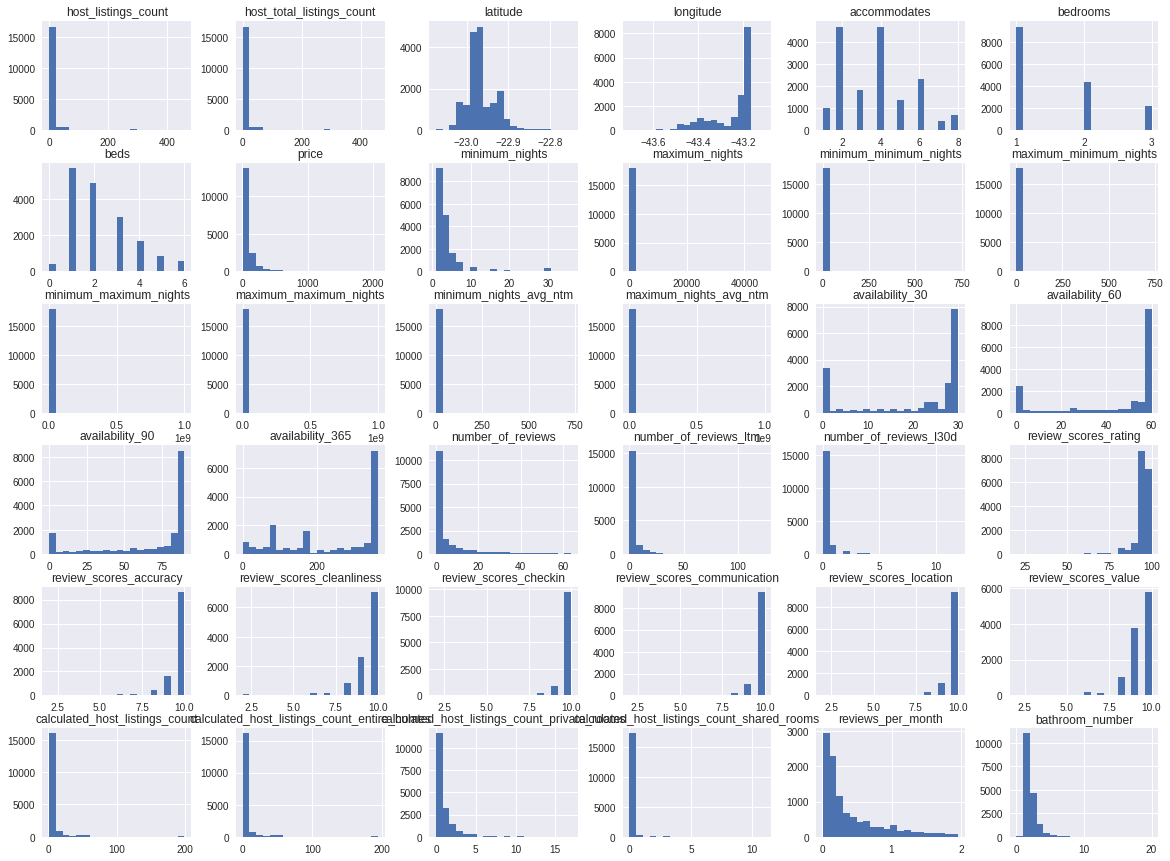

In [ ]:
#pay attention to the distributions. Normal and skewed distributions have different manegemnts for exemple
x_train.hist(bins = 20, figsize=(20, 15))

In [ ]:
#one of the most relevant steps on teh data prepartaion is related to data type. Pay attentiion on it.
x_train.dtypes

host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                    float64
bedrooms                                        float64
beds                                            

##Data cleaning
  
  Missing values

In [ ]:
# notice tha the features host_acceptance_rate and host_response_rate are an object features but could be converted to numeric

x_train['host_response_rate']= [str(c).replace('%', '') for c in x_train['host_response_rate']]
x_train['host_response_rate'] = [float(c) for c in x_train['host_response_rate']]

x_train['host_acceptance_rate']= [str(c).replace('%', '') for c in x_train['host_acceptance_rate']]
x_train['host_acceptance_rate'] = [float(c) for c in x_train['host_acceptance_rate']]

x_test['host_response_rate']= [str(c).replace('%', '') for c in x_test['host_response_rate']]
x_test['host_response_rate'] = [float(c) for c in x_test['host_response_rate']]

x_test['host_acceptance_rate']= [str(c).replace('%', '') for c in x_test['host_acceptance_rate']]
x_test['host_acceptance_rate'] = [float(c) for c in x_test['host_acceptance_rate']]


In [ ]:
#discover which features are numerical (int and float) to deal with it
#this list is particularly important, because we can iterate over ir every time we want to deal with numeric features

numeric_features_train = []
for c in x_train.columns:
  if x_train[c].dtypes == 'float64':
    numeric_features_train.append(c)
  if x_train[c].dtypes == 'int64':
    numeric_features_train.append(c)

numeric_features_test = []
for c in x_train.columns:
  if x_test[c].dtypes == 'float64':
    numeric_features_test.append(c)
  if x_test[c].dtypes == 'int64':
    numeric_features_test.append(c)
numeric_features_train

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'bathroom_number']

In [ ]:
# as it seems before the distribution of the features are not normal. In pratical the median could be more representative than mean
#cause of it we will input median in the missing values

imputer = SimpleImputer(strategy = 'median')

for c in numeric_features_train:
  x_train[c] = imputer.fit_transform(x_train[c].values.reshape(-1,1))


for c in numeric_features_test:
  x_test[c] = imputer.fit_transform(x_test[c].values.reshape(-1,1))

In [ ]:
# the feature neighbourhood have a lot of redundant infromation (with the feature _neighbourhood_cleananced) and the property type with room type 

x_train = x_train.drop(['neighbourhood'], axis = 1)
x_train = x_train.drop(['property_type'], axis = 1)
  
x_test = x_test.drop(['neighbourhood'], axis = 1)
x_test = x_test.drop(['property_type'], axis = 1)
  

In [ ]:
#there's any missing values in the numeric features? : NO! Great
x_train.isnull().sum()/ x_train.shape[0]

host_response_time                              0.320776
host_response_rate                              0.000000
host_acceptance_rate                            0.000000
host_is_superhost                               0.000390
host_listings_count                             0.000000
host_total_listings_count                       0.000000
host_verifications                              0.000000
host_has_profile_pic                            0.000390
host_identity_verified                          0.000390
neighbourhood_cleansed                          0.000000
latitude                                        0.000000
longitude                                       0.000000
room_type                                       0.000000
accommodates                                    0.000000
bedrooms                                        0.000000
beds                                            0.000000
price                                           0.000000
minimum_nights                 

In [ ]:
#discovering who are the categorical features
#this list is so important as numerical features list

categorical_features = []

for c in x_train.columns:
  if x_train[c].dtypes == 'object':
    categorical_features.append(c)

categorical_features = []

for c in x_test.columns:
  if x_test[c].dtypes == 'object':
    categorical_features.append(c)
categorical_features

['host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'has_availability',
 'instant_bookable',
 'bathroom_type']

In [ ]:
#imputer the most common  value in the NaN cells

for c in categorical_features:
  x_train[c] = x_train[c].fillna(x_train[c].value_counts()[0])

for c in categorical_features:
  x_test[c] = x_test[c].fillna(x_test[c].value_counts()[0])

In [ ]:
#host_response_time inputs a numeber instead of a category, so lets fix it

x_train['host_response_time'] = np.where(x_train['host_response_time'] == 4889, 'unknow', x_train['host_response_time'])
x_train['host_response_time'].value_counts()

unknow                5756
within an hour        4889
within a few hours    2975
within a day          2468
a few days or more    1856
Name: host_response_time, dtype: int64

In [ ]:
#no missing values anymore!!!
x_train.isnull().sum()

host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0


In [ ]:
x_train.head(2)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type,bathroom_number
1,unknow,100.0,100.0,f,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Copacabana,-22.97271,-43.18758,Entire home/apt,5.0,2.0,3.0,78.91,4.0,90.0,4.0,4.0,90.0,90.0,4.0,90.0,t,30.0,53.0,66.0,340.0,45.0,3.0,0.0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,f,1.0,1.0,0.0,0.0,0.72,baths,2.0
2,unknow,100.0,92.0,f,1.0,1.0,"['phone', 'facebook']",t,f,Barra da Tijuca,-23.00251,-43.39049,Entire home/apt,4.0,2.0,2.0,282.49,15.0,1125.0,15.0,15.0,1125.0,1125.0,15.0,1125.0,t,23.0,53.0,83.0,358.0,0.0,0.0,0.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.0,1.0,0.0,0.0,0.21,baths,2.0


###Handling with categorical features

In [ ]:
#analize it, searching for possible categorical features to handle

for c in categorical_features:
  print(c, end=' ')
  print(f'{len(x_train[c].value_counts())}')
  print(' ')

  #as we can see, there are two feature that will become troubles to us: host_verifications and neighbourhood_cleansed
  #there ar too many unique values on it

host_response_time 5
 
host_is_superhost 3
 
host_verifications 299
 
host_has_profile_pic 3
 
host_identity_verified 3
 
neighbourhood_cleansed 151
 
room_type 4
 
has_availability 1
 
instant_bookable 2
 
bathroom_type 8
 


In [ ]:
#look at this number of categories!!! Its huge

x_train['neighbourhood_cleansed'].value_counts()

Copacabana          4998
Barra da Tijuca     1814
Ipanema             1633
Jacarepaguá          990
Botafogo             835
                    ... 
Grumari                1
Acari                  1
Zumbi                  1
Magalhães Bastos       1
Maré                   1
Name: neighbourhood_cleansed, Length: 151, dtype: int64

In [ ]:
#we have to filter the main neighbourhoods to use it as a category later

main_neighbourhood = [
'Copacabana',                  
'Barra da Tijuca',            
'Ipanema',                     
'Jacarepaguá',                  
'Botafogo',                     
'Recreio dos Bandeirantes',    
'Leblon',                       
'Santa Teresa',                 
'Centro',                       
'Flamengo',                     
'Leme',                         
'Tijuca',                       
'Laranjeiras',                  
'Camorim',                      
'Lagoa' 
]

In [ ]:
#if a neighbourhood is not in the main_neighbourhood list we will consider it as "unknow"

cont = 0
for c in x_train['neighbourhood_cleansed']:
  cont=cont+1
  if c in main_neighbourhood:
    pass
  else:
    x_train['neighbourhood_cleansed'][cont]='unknow'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:

cont_test = 0
for c in x_test['neighbourhood_cleansed']:
  cont_test = cont_test+1
  if c in main_neighbourhood:
    pass
  else:
    x_test['neighbourhood_cleansed'][cont_test] = 'unknow'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x_test['neighbourhood_cleansed'].value_counts()

Copacabana                  1628
unknow                      1101
Barra da Tijuca              618
Ipanema                      569
Jacarepaguá                  303
Botafogo                     289
Leblon                       266
Recreio dos Bandeirantes     252
Santa Teresa                 200
Centro                       164
Flamengo                     132
Tijuca                       120
Laranjeiras                  109
Leme                         104
Lagoa                         70
Camorim                       57
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
#done

x_train['neighbourhood_cleansed'].value_counts()

Copacabana                  4998
unknow                      3206
Barra da Tijuca             1814
Ipanema                     1633
Jacarepaguá                  990
Botafogo                     835
Recreio dos Bandeirantes     796
Leblon                       762
Santa Teresa                 656
Centro                       519
Flamengo                     398
Leme                         338
Tijuca                       338
Laranjeiras                  306
Camorim                      182
Lagoa                        173
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
#and that's worse, because each categorys is a list with a lot of verification types. Some of them are almost identical.

x_train['host_verifications'].value_counts()

['email', 'phone']                                                                                                                                     2885
['email', 'phone', 'reviews', 'jumio', 'government_id']                                                                                                1351
['email', 'phone', 'reviews']                                                                                                                          1269
['email', 'phone', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']                                                      860
['phone']                                                                                                                                               748
                                                                                                                                                       ... 
['email', 'jumio', 'offline_government_id', 'selfie', 'governmen

In [ ]:
category = x_train['host_verifications'][1]
category

#observe that is a string (seems like a list, but is a string)

"['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']"

In [ ]:
# to handle with this feature we will chose the main verifications that we want
#them we will create a OneHotEncoder manually fow each verification
#but first, lets creat this new features

#for a better compreenssion of the process its done step by step, for each feature

phone_list = []
email_list = []
facebook_list = []
review_list = []
government_id_list = []

for c in range(x_train.shape[0]):
  phone_list.append('0')
x_train['phone_verification'] = phone_list
x_train['phone_verification']

for c in range(x_train.shape[0]):
  email_list.append('0')
x_train['email_verification'] = email_list
x_train['email_verification']

for c in range(x_train.shape[0]):
  facebook_list.append('0')
x_train['facebook_verification'] = facebook_list
x_train['facebook_verification']

for c in range(x_train.shape[0]):
  review_list.append('0')
x_train['review_verification'] = review_list
x_train['review_verification']

for c in range(x_train.shape[0]):
  government_id_list.append('0')
x_train['government_id_verification'] = government_id_list


phone_list_test = []
email_list_test = []
facebook_list_test = []
review_list_test = []
government_id_list_test = []

for c in range(x_test.shape[0]):
  phone_list_test.append('0')
x_test['phone_verification'] = phone_list_test
x_test['phone_verification']

for c in range(x_test.shape[0]):
  email_list_test.append('0')
x_test['email_verification'] = email_list_test
x_test['email_verification']

for c in range(x_test.shape[0]):
  facebook_list_test.append('0')
x_test['facebook_verification'] = facebook_list_test
x_test['facebook_verification']

for c in range(x_test.shape[0]):
  review_list_test.append('0')
x_test['review_verification'] = review_list_test
x_test['review_verification']

for c in range(x_test.shape[0]):
  government_id_list_test.append('0')
x_test['government_id_verification'] = government_id_list_test




x_train['government_id_verification']


1        0
2        0
3        0
4        0
5        0
        ..
17940    0
17941    0
17942    0
17943    0
17944    0
Name: government_id_verification, Length: 17944, dtype: object

In [ ]:
x_train.head(1)

#it worked!! (look at the last columns of the dataframe)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type,bathroom_number,phone_verification,email_verification,facebook_verification,review_verification,government_id_verification
1,unknow,100.0,100.0,f,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Copacabana,-22.97271,-43.18758,Entire home/apt,5.0,2.0,3.0,78.91,4.0,90.0,4.0,4.0,90.0,90.0,4.0,90.0,t,30.0,53.0,66.0,340.0,45.0,3.0,0.0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,f,1.0,1.0,0.0,0.0,0.72,baths,2.0,0,0,0,0,0


In [ ]:
x_train['host_verifications'][1]

"['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']"

In [ ]:
#observation: here is the point that our anterior reindexation of the dataframes become relevant.
#The anterior index were shuffled by the train_test_split method, and become harder to parse  on a loop
#now, on every line of the host_verification feature will be analized by the presence of the main verifications and them input it on the coreesponded new feature

cont = 0

for c in x_train['host_verifications']:
  c = c.replace("'", "")
  c = c.replace("[", "")
  c = c.replace("]", "")
  c = c.replace(",", "")
  c = c.split()
  cont = cont + 1
  if 'phone' in c:
    x_train['phone_verification'][cont] = x_train['phone_verification'][cont].replace('0', '1')
  if 'email' in c:
    x_train['email_verification'][cont] = x_train['email_verification'][cont].replace('0', '1')
  if 'facebook' in c:
    x_train['facebook_verification'][cont] = x_train['facebook_verification'][cont].replace('0', '1')
  if 'reviews' in c:
    x_train['review_verification'][cont] = x_train['review_verification'][cont].replace('0', '1')
  if 'government_id' in c:
    x_train['government_id_verification'][cont] = x_train['government_id_verification'][cont].replace('0', '1')
  else:
    pass

cont_test = 0

for c in x_test['host_verifications']:
  c = c.replace("'", "")
  c = c.replace("[", "")
  c = c.replace("]", "")
  c = c.replace(",", "")
  c = c.split()
  cont_test = cont_test + 1
  if 'phone' in c:
    x_test['phone_verification'][cont_test] = x_test['phone_verification'][cont_test].replace('0', '1')
  if 'email' in c:
    x_test['email_verification'][cont_test] = x_test['email_verification'][cont_test].replace('0', '1')
  if 'facebook' in c:
    x_test['facebook_verification'][cont_test] = x_test['facebook_verification'][cont_test].replace('0', '1')
  if 'reviews' in c:
    x_test['review_verification'][cont_test] = x_test['review_verification'][cont_test].replace('0', '1')
  if 'government_id' in c:
    x_test['government_id_verification'][cont_test] = x_test['government_id_verification'][cont_test].replace('0', '1')
  else:
    pass


#pay attetion on that : 'A value is trying to be set on a copy of a slice from a DataFrame'
#this means the pandas has created a slice of the dataframe to convert the new features and cant be sure it worked. Be sure that is all going on correctly

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: Settin

In [ ]:
#machine learning algorythms work better with numerical data, so lets do it!!!

x_train['phone_verification'] = [float(c) for c in x_train['phone_verification']]
x_train['email_verification'] = [float(c) for c in x_train['email_verification']]
x_train['facebook_verification'] = [float(c) for c in x_train['facebook_verification']]
x_train['review_verification'] = [float(c) for c in x_train['review_verification']]
x_train['government_id_verification'] = [float(c) for c in x_train['government_id_verification']]

x_test['phone_verification'] = [float(c) for c in x_test['phone_verification']]
x_test['email_verification'] = [float(c) for c in x_test['email_verification']]
x_test['facebook_verification'] = [float(c) for c in x_test['facebook_verification']]
x_test['review_verification'] = [float(c) for c in x_test['review_verification']]
x_test['government_id_verification'] = [float(c) for c in x_test['government_id_verification']]

In [ ]:
# we already dealed with this feature, so lets drop it

x_train = x_train.drop('host_verifications', axis = 1)
x_test = x_test.drop('host_verifications', axis = 1)

In [ ]:
x_train.head(4)

#it worked!

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type,bathroom_number,phone_verification,email_verification,facebook_verification,review_verification,government_id_verification
1,unknow,100.0,100.0,f,2.0,2.0,t,t,Copacabana,-22.97271,-43.18758,Entire home/apt,5.0,2.0,3.0,78.91,4.0,90.0,4.0,4.0,90.0,90.0,4.0,90.0,t,30.0,53.0,66.0,340.0,45.0,3.0,0.0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,f,1.0,1.0,0.0,0.0,0.72,baths,2.0,1.0,1.0,0.0,1.0,1.0
2,unknow,100.0,92.0,f,1.0,1.0,t,f,Barra da Tijuca,-23.00251,-43.39049,Entire home/apt,4.0,2.0,2.0,282.49,15.0,1125.0,15.0,15.0,1125.0,1125.0,15.0,1125.0,t,23.0,53.0,83.0,358.0,0.0,0.0,0.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1.0,1.0,0.0,0.0,0.21,baths,2.0,1.0,0.0,1.0,0.0,0.0
3,unknow,100.0,92.0,f,3.0,3.0,t,t,unknow,-22.90237,-43.24420,Private room,1.0,1.0,1.0,65.91,30.0,1125.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,30.0,60.0,90.0,365.0,0.0,0.0,0.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2.0,0.0,2.0,0.0,0.21,sharedbaths,1.5,1.0,1.0,1.0,0.0,1.0
4,within an hour,100.0,100.0,f,0.0,0.0,t,f,Recreio dos Bandeirantes,-23.02085,-43.48499,Entire home/apt,5.0,2.0,3.0,47.08,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,17.0,47.0,75.0,350.0,26.0,26.0,5.0,95.0,10.0,10.0,10.0,10.0,10.0,9.0,t,1.0,1.0,0.0,0.0,0.21,bath,1.0,1.0,1.0,0.0,0.0,0.0


###Let's start encoding our categorical features

In [ ]:
# here we going to selec the relevant features to encode

selected_categorical_features = ['host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'has_availability',
 'instant_bookable',
 'bathroom_type']

In [ ]:
#we have to convert them to string because the sklearn LabelEncoder only works with string and numerics features

def features_to_string(selected_categorical_features):
  for feature in selected_categorical_features:  
    x_train[feature] = [str(c) for c in x_train[feature]]
    x_test[feature] = [str(c) for c in x_test[feature]]
features_to_string(selected_categorical_features)

In [ ]:
#encoding every single categorical feature

labelencoder = LabelEncoder()
def label_encoding(selected_categorical_features):
  for c in selected_categorical_features:
   x_train[c] = labelencoder.fit_transform(x_train[c])
   x_test[c] = labelencoder.fit_transform(x_test[c])
label_encoding(selected_categorical_features)


In [ ]:
x_train.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type,bathroom_number,phone_verification,email_verification,facebook_verification,review_verification,government_id_verification
1,1,100.0,100.0,1,2.0,2.0,2,2,4,-22.97271,-43.18758,0,5.0,2.0,3.0,78.91,4.0,90.0,4.0,4.0,90.0,90.0,4.0,90.0,0,30.0,53.0,66.0,340.0,45.0,3.0,0.0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0,1.0,1.0,0.0,0.0,0.72,4,2.0,1.0,1.0,0.0,1.0,1.0
2,1,100.0,92.0,1,1.0,1.0,2,1,0,-23.00251,-43.39049,0,4.0,2.0,2.0,282.49,15.0,1125.0,15.0,15.0,1125.0,1125.0,15.0,1125.0,0,23.0,53.0,83.0,358.0,0.0,0.0,0.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.0,1.0,0.0,0.0,0.21,4,2.0,1.0,0.0,1.0,0.0,0.0
3,1,100.0,92.0,1,3.0,3.0,2,2,15,-22.90237,-43.24420,2,1.0,1.0,1.0,65.91,30.0,1125.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,0,30.0,60.0,90.0,365.0,0.0,0.0,0.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.0,0.0,2.0,0.0,0.21,7,1.5,1.0,1.0,1.0,0.0,1.0
4,4,100.0,100.0,1,0.0,0.0,2,1,12,-23.02085,-43.48499,0,5.0,2.0,3.0,47.08,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,0,17.0,47.0,75.0,350.0,26.0,26.0,5.0,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1.0,1.0,0.0,0.0,0.21,3,1.0,1.0,1.0,0.0,0.0,0.0
5,0,43.0,20.0,1,1.0,1.0,2,1,4,-22.96844,-43.18480,2,1.0,1.0,1.0,11.30,3.0,180.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,30.0,36.0,36.0,36.0,1.0,1.0,0.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.0,0.0,1.0,0.0,0.13,4,2.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
#we1ll use another function to onehoteencode this data. 
#Lib make_column_transformer is greate fo that

x_transitory = x_train.copy()
x_transitory_test = x_test.copy()

column_transformed = make_column_transformer(
    (OneHotEncoder(), ['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'has_availability',
 'instant_bookable',
 'bathroom_type']), remainder='passthrough')

x_new_train = column_transformed.fit_transform(x_transitory)
x_new_test =column_transformed.fit_transform(x_transitory_test)

In [ ]:
x_new_train = pd.DataFrame(x_new_train)
x_new_test = pd.DataFrame(x_new_test)
x_new_train.head()

#here we have our Labelencoded and OneHotEncoded datafrae
#i choose to not use Standard Scaler on numeric features because it performed poorly with this dataset before
#but fell free to do it

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,-22.97271,-43.18758,5.0,2.0,3.0,78.91,4.0,90.0,4.0,4.0,90.0,90.0,4.0,90.0,30.0,53.0,66.0,340.0,45.0,3.0,0.0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,0.72,2.0,1.0,1.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-23.00251,-43.39049,4.0,2.0,2.0,282.49,15.0,1125.0,15.0,15.0,1125.0,1125.0,15.0,1125.0,23.0,53.0,83.0,358.0,0.0,0.0,0.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.0,0.0,0.0,0.21,2.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,-22.90237,-43.24420,1.0,1.0,1.0,65.91,30.0,1125.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,30.0,60.0,90.0,365.0,0.0,0.0,0.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,0.0,2.0,0.0,0.21,1.5,1.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-23.02085,-43.48499,5.0,2.0,3.0,47.08,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,17.0,47.0,75.0,350.0,26.0,26.0,5.0,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,0.21,1.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-22.96844,-43.18480,1.0,1.0,1.0,11.30,3.0,180.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,30.0,36.0,36.0,36.0,1.0,1.0,0.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,1.0,0.0,0.13,2.0,1.0,1.0,0.0,0.0,0.0


So far our dataset is ready for be used in a machine learning models

Take a look at y_test distribution

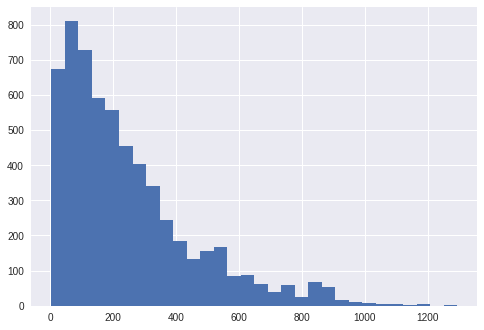

In [ ]:
y_test.hist(bins=30)

###These are the base models. We have to beat this results

In [ ]:
lin = LinearRegression()
lin_model = lin.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Square Error: {rmse}')

Mean Square Error: 148.9697262749808


In [ ]:
tree = DecisionTreeRegressor()
tree_model = tree.fit(x_train, y_train)
tree_y_pred = tree_model.predict(x_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)
print(f'Mean Square Error: {tree_rmse}')

Mean Square Error: 9.142705147633555


In [ ]:
random = RandomForestRegressor()
random_model = random.fit(x_train, y_train)
random_y_pred = random_model.predict(x_test)
random_mse = mean_squared_error(y_test, random_y_pred)
random_rmse = np.sqrt(random_mse)
print(f'Mean Square Error: {random_rmse}')

Mean Square Error: 7.071605223719913


with hoted dataset

In [ ]:
lin = LinearRegression()
lin_model = lin.fit(x_new_train, y_train)
y_pred = lin_model.predict(x_new_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Square Error: {rmse}')

Mean Square Error: 145.27561779342423


In [ ]:
tree = DecisionTreeRegressor()
tree_model = tree.fit(x_new_train, y_train)
tree_y_pred = tree_model.predict(x_new_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)
print(f'Mean Square Error: {tree_rmse}')

Mean Square Error: 9.369190575128908


In [ ]:
random = RandomForestRegressor()
random_model = random.fit(x_new_train, y_train)
random_y_pred = random_model.predict(x_new_test)
random_mse = mean_squared_error(y_test, random_y_pred)
random_rmse = np.sqrt(random_mse)
print(f'Mean Square Error: {random_rmse}')

Mean Square Error: 6.594343255311055


In case you want to see how these models would perform if the use standard scaler:

In [ ]:
x_transitory2 = x_train.copy()
x_transitory2_test = x_test.copy()

column_trans = make_column_transformer(
    (OneHotEncoder(), ['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'has_availability',
 'instant_bookable',
 'bathroom_type']), remainder=StandardScaler())

train_final = column_trans.fit_transform(x_transitory2)
test_final = column_transformed.fit_transform(x_transitory2_test)
train_final = pd.DataFrame(train_final)
test_final = pd.DataFrame(test_final)
train_final.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.202036,-0.222457,0.648061,0.714127,0.731074,0.544166,-0.136803,0.079061,-0.811187,-0.030747,-0.063338,-0.007551,-0.007552,-0.039475,-0.007552,0.788656,0.411373,-0.026040,0.783973,3.306106,0.023163,-0.303946,-0.115579,0.296285,0.399745,0.204899,0.224446,0.243432,-0.655922,-0.259215,-0.219347,-0.473572,-0.140595,1.075169,0.361606,0.067339,0.331431,-0.568083,0.964194,0.805864
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.236751,-1.057646,-1.436631,0.137088,0.731074,-0.194563,1.072954,2.510171,0.738679,0.622181,0.540097,-0.007412,-0.007414,0.608644,-0.007413,0.192625,0.411373,0.525092,0.924142,-0.544746,-0.474998,-0.303946,0.022528,0.296285,0.399745,0.204899,0.224446,0.243432,0.490121,-0.259215,-0.219347,-0.473572,-0.140595,-0.335017,0.361606,0.067339,-3.017218,1.760305,-1.037136,-1.240905
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.167320,1.748925,0.066349,-1.594026,-0.694064,-0.933292,-0.214055,5.825322,0.738679,1.512536,1.362963,-0.007412,-0.007414,1.492444,-0.007413,0.788656,0.728953,0.752029,0.978652,-0.544746,-0.474998,-0.303946,0.022528,0.296285,0.399745,0.204899,0.224446,0.243432,0.490121,-0.210240,-0.269512,0.705692,-0.140595,-0.335017,-0.129327,0.067339,0.331431,1.760305,-1.037136,0.805864
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.271467,-1.571652,-2.407522,0.714127,0.731074,0.544166,-0.325950,-0.362960,0.738679,-0.149461,-0.173054,-0.007412,-0.007414,-0.157315,-0.007413,-0.318258,0.139162,0.265736,0.861844,1.680191,3.842398,6.344047,0.022528,0.296285,0.399745,0.204899,0.224446,0.243432,-0.655922,-0.259215,-0.219347,-0.473572,-0.140595,-0.335017,-0.620260,0.067339,0.331431,-0.568083,-1.037136,-1.240905
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.236751,-0.102784,0.676623,-1.594026,-0.694064,-0.933292,-0.538570,-0.141949,-0.676416,-0.208818,-0.227912,-0.007412,-0.007414,-0.216235,-0.007413,0.788656,-0.359891,-0.998626,-1.583317,-0.459171,-0.308945,-0.303946,0.713061,0.296285,0.399745,0.204899,0.224446,0.243432,0.490121,-0.259215,-0.269512,0.116060,-0.140595,-0.556222,0.361606,0.067339,0.331431,-0.568083,-1.037136,-1.240905


With onehotencoded and standarscaler

In [ ]:
linear_st = LinearRegression()
linear_model_st = linear_st.fit(train_final, y_train)
y_pred_st = linear_model_st.predict(test_final)
linear_mse_st = mean_squared_error(y_test, y_pred)
linear_rmse_st = np.sqrt(linear_mse_st)
print(f'Mean Square Error: {linear_rmse_st}')

Mean Square Error: 145.27561779342423


In [ ]:
tree_st = DecisionTreeRegressor()
tree_model_st = tree_st.fit(train_final, y_train)
tree_y_pred_st = tree_model_st.predict(test_final)
tree_mse_st = mean_squared_error(y_test, tree_y_pred_st)
tree_rmse_st = np.sqrt(tree_mse_st)
print(f'Mean Square Error: {tree_rmse_st}')

Mean Square Error: 322.58719032841816


In [ ]:
random_st = RandomForestRegressor()
random_model_st = random_st.fit(x_new_train, y_train)
random_y_pred_st = random_model_st.predict(x_new_test)
random_mse_st = mean_squared_error(y_test, random_y_pred_st)
random_rmse_st = np.sqrt(random_mse_st)
print(f'Mean Square Error: {random_rmse_st}')

Mean Square Error: 6.955039258004086


##Hyperparameters tuning

Here we'l use GridSearch, it turns our work easier than manually tune out hyperparameters.

####DecisionTreeRegressor

In [ ]:
n_leafs = [1, 5, 10, 20, 50, 100]
depths = np.arange(1, 21)
param_grid_tree = [{'max_depth':depths,
              'min_samples_leaf':n_leafs}]

In [ ]:
gd_tree = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = param_grid_tree, scoring= 'neg_mean_squared_error', cv=10)
best_decisiontree = gd_tree.fit(x_new_train, y_train)
print(best_decisiontree.best_params_) 

{'max_depth': 10, 'min_samples_leaf': 1}


In [ ]:
greattree = RandomForestRegressor(max_depth=16, min_samples_leaf=1)
best_tree = greattree.fit(x_new_train, y_train)
besttree_pred = best_tree.predict(x_new_test)
besttree_mse = mean_squared_error(y_test, besttree_pred)
besttree_rmse = np.sqrt(besttree_mse)
print(f'Mean Square Error: {besttree_rmse}')

Mean Square Error: 7.16980229252723


Our model its better than before. The base RMSE was around 8 or 9, and now its around 6.5

####RandomFoestRegressor

In [ ]:
param_grid_forest = [
{'n_estimators': [70, 75, 80], 'max_features': [ 60, 65, 70]},
{'bootstrap': [False], 'n_estimators': [70, 75], 'max_features': [60, 65]},
]

In [ ]:
#that momento can take a long time to run. Enjoy the moment and take a coffe.

gd_forest = GridSearchCV(RandomForestRegressor(), param_grid_forest, cv=5,
                         scoring='neg_mean_squared_error')
best_forest = gd_forest.fit(x_new_train, y_train)
print(best_forest.best_params_) 


{'bootstrap': False, 'max_features': 60, 'n_estimators': 75}


In [ ]:
#i don't see too much improvement here

greatforest = RandomForestRegressor(max_features=60, n_estimators= 70)
best_forest = greatforest.fit(x_new_train, y_train)
bestforest_pred = best_forest.predict(x_new_test)
bestforest_mse = mean_squared_error(y_test, bestforest_pred)
bestforest_rmse = np.sqrt(bestforest_mse)
print(f'Mean Square Error: {bestforest_rmse}')


Mean Square Error: 7.354491056071993


IN THE END:

It's obvious that the DecisionTreeRegressor performed well and also didn't took a long time do compute it. That model could be used to estimate cost_benefit_ratio for new AirBnb locations in Rio de Janeiro just in they are posted and thena estimate if its reasonable to make a early reservation.